In [23]:
import pandas as pd
import matplotlib.pyplot as plt

street = pd.read_parquet("processed_data/street.parquet")
search = pd.read_parquet("processed_data/search.parquet")
outcomes = pd.read_parquet("processed_data/outcomes.parquet")
busylocations = pd.read_parquet("processed_data/london_busy.parquet")
deprivation = pd.read_parquet("processed_data/deprivation_index.parquet")
ethnicity = pd.read_parquet("processed_data/ethnicity_index.parquet")
age = pd.read_parquet("processed_data/age_index.parquet")

## EDA on Street 

In [64]:
street

,Crime ID,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,Last outcome category,year,month
0,None,City of London Police,City of London Police,-0.093948,51.518078,On or near Monkwell Square,E01000002,NaN,2010,12
1,None,City of London Police,City of London Police,-0.095860,51.521660,On or near Fann Street,E01000003,NaN,2010,12
2,None,City of London Police,City of London Police,-0.092719,51.512653,On or near Queen Victoria Street,E01032739,NaN,2010,12
3,None,City of London Police,City of London Police,-0.088203,51.518261,On or near Moorgate,E01032739,NaN,2010,12
4,None,City of London Police,City of London Police,-0.086724,51.517445,On or near Finsbury Circus,E01032739,NaN,2010,12
...,...,...,...,...,...,...,...,...,...,...
1026270,8bd05b8ec4487edc170e0eff718bce22522502be250a17...,Metropolitan Police Service,Metropolitan Police Service,-0.149923,51.485870,On or near A3212,E01033597,Investigation complete; no suspect identified,2025,2
1026271,b9e167bf393608f58352f1026376bdf35e749de7a177bf...,Metropolitan Police Service,Metropolitan Police Service,-0.150502,51.486519,On or near Hospital,E01033597,Investigation complete; no suspect identified,2025,2
1026272,594ff4f525ed84d29b3d6b8ed92a314d3b02de16d4fc1a...,Metropolitan Police Service,Metropolitan Police Service,-0.149923,51.485870,On or near A3212,E01033597,Under investigation,2025,2
1026273,ad8f08259459c4289073864275476555baec0d1a0ebe36...,Metropolitan Police Service,Metropolitan Police Service,-0.146684,51.487968,On or near Peabody Avenue,E01033599,Investigation complete; no suspect identified,2025,2


#### Distribution of Values

##### Longitude and Latitude

In [65]:
# Count total rows
initial_rows = len(street)
print(initial_rows, 'total number of initial rows')

# Missing Longitude analysis
missing_long = street[street['Longitude'].isna()]
num_missing_long = len(missing_long)
print(num_missing_long, 'number of rows that have Longitude missing (unidentifiable)')
print(num_missing_long / initial_rows * 100, '% percentage of rows that are missing Longitude')

# Rows with Longitude present
print(initial_rows - num_missing_long, 'number of rows that contain Longitude')

# Missing Latitude analysis
missing_lat = street[street['Latitude'].isna()]
num_missing_lat = len(missing_lat)
print(num_missing_lat, 'number of rows that have Latitude missing (unidentifiable)')
print(num_missing_lat / initial_rows * 100, '% percentage of rows that are missing Latitude')

# Rows with Latitude present
print(initial_rows - num_missing_lat, 'number of rows that contain Latitude')

# Check rows missing both Latitude and Longitude
missing_both = street[street['Latitude'].isna() & street['Longitude'].isna()]
num_missing_both = len(missing_both)
print(num_missing_both, 'number of rows missing both Latitude and Longitude')

# Verify if all missing values are in the same rows
if num_missing_both == num_missing_lat == num_missing_long:
    print("✅ All missing Latitude and Longitude values are from the same rows.")
else:
    print("⚠️ Latitude and Longitude missing values are not from the exact same rows.")


1026275 total number of initial rows
7520 number of rows that have Longitude missing (unidentifiable)
0.7327470707169131 % percentage of rows that are missing Longitude
1018755 number of rows that contain Longitude
7520 number of rows that have Latitude missing (unidentifiable)
0.7327470707169131 % percentage of rows that are missing Latitude
1018755 number of rows that contain Latitude
7520 number of rows missing both Latitude and Longitude
✅ All missing Latitude and Longitude values are from the same rows.


In [66]:
street[street['Longitude'].isna() & street['LSOA code'].isna()]

,Crime ID,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,Last outcome category,year,month
79162,None,City of London Police,City of London Police,NaN,NaN,No Location,NaN,NaN,2011,10
159234,5f2b391ce5c92e44bef74f08e5b822f1f106a587873a33...,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,Investigation complete; no suspect identified,2012,7
159235,d784fa962f41381d3d9e68fce1637c5205c084c255c027...,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,Defendant found not guilty,2012,7
159236,d4d8ecdbd9926356ef0d557835059ce8ad3072a681be68...,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,Court case unable to proceed,2012,7
159237,5a8be478804ca8f0d7c76fd00b359e32dc875fb79fdbb0...,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,Investigation complete; no suspect identified,2012,7
...,...,...,...,...,...,...,...,...,...,...
1018055,24da073f43afbbffda0fe6ae9dac07d38fcb384975797e...,City of London Police,City of London Police,NaN,NaN,No Location,NaN,Investigation complete; no suspect identified,2025,1
1018056,cacd4f8162ee1a25732d40edea77e6cc150335eeb31bda...,City of London Police,City of London Police,NaN,NaN,No Location,NaN,Under investigation,2025,1
1018057,dce96dab6b6c4491a14bfa3704e5a96251ecd71941862b...,City of London Police,City of London Police,NaN,NaN,No Location,NaN,Under investigation,2025,1
1022534,2f32cb8e3d3fbba796187bddfaa511132bf535bc8fc644...,City of London Police,City of London Police,NaN,NaN,No Location,NaN,Under investigation,2025,2


##### Crime ID - Missing Values

In [67]:
no_missing_rows = len(street[street['Crime ID'].isna()])
initial_rows = len(street)
official_rows = initial_rows-no_missing_rows

print(initial_rows, 'total number initial rows')
print(no_missing_rows, 'number rows that have CrimeID missing (unidentifiable)')
print(no_missing_rows/initial_rows*100, '% percentage of rows that are missing CrimeID')

print(official_rows, 'number of rows that contain CrimeID')

street[street['Crime ID'].isna()]

1026275 total number initial rows
95383 number rows that have CrimeID missing (unidentifiable)
9.294097585929698 % percentage of rows that are missing CrimeID
930892 number of rows that contain CrimeID


,Crime ID,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,Last outcome category,year,month
0,None,City of London Police,City of London Police,-0.093948,51.518078,On or near Monkwell Square,E01000002,NaN,2010,12
1,None,City of London Police,City of London Police,-0.095860,51.521660,On or near Fann Street,E01000003,NaN,2010,12
2,None,City of London Police,City of London Police,-0.092719,51.512653,On or near Queen Victoria Street,E01032739,NaN,2010,12
3,None,City of London Police,City of London Police,-0.088203,51.518261,On or near Moorgate,E01032739,NaN,2010,12
4,None,City of London Police,City of London Police,-0.086724,51.517445,On or near Finsbury Circus,E01032739,NaN,2010,12
...,...,...,...,...,...,...,...,...,...,...
95378,None,Metropolitan Police Service,Metropolitan Police Service,-0.144819,51.488857,On or near Cumberland Street,E01004753,NaN,2011,11
95379,None,Metropolitan Police Service,Metropolitan Police Service,-0.149155,51.491337,On or near Buckingham Palace Road,E01004666,NaN,2011,11
95380,None,Metropolitan Police Service,Metropolitan Police Service,-0.144855,51.492924,On or near Hugh Street,E01004750,NaN,2011,11
95381,None,Metropolitan Police Service,Metropolitan Police Service,-0.148113,51.490025,On or near Warwick Way,E01033599,NaN,2011,11


##### Reported By

In [68]:
street[street['Reported by'].isna() == True]

# All crimes have a value in Reported By

,Crime ID,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,Last outcome category,year,month


In [69]:
street['Reported by'].unique()

['City of London Police', 'Metropolitan Police Service', 'Surrey Police']
Categories (3, object): ['City of London Police', 'Metropolitan Police Service', 'Surrey Police']

In [70]:
street[street['Reported by'] == 'Surrey Police']

#This looks okay, because the 'Falls Within' column has the relevant police force       

,Crime ID,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,Last outcome category,year,month
404602,8087db672b2f26b8e8d8c8ee1bc1fdb59257b662c94eee...,Surrey Police,City of London Police,-0.097334,51.521568,On or near Fann Street,E01000001,Investigation complete; no suspect identified,2015,8
404603,24dcea4f38819a458c90cbf5c4c87a69638bad2b01e382...,Surrey Police,City of London Police,-0.078806,51.516193,On or near Devonshire Square,E01000005,Investigation complete; no suspect identified,2015,8
404604,9af98a31210b7918d1bc55adfb19cf59d28aed05eaa598...,Surrey Police,City of London Police,-0.079011,51.509613,On or near Pedestrian Subway,E01032739,Suspect charged as part of another case,2015,8
404605,05a7a19c1de515378a5bf5ca5e82583b3a17b050451568...,Surrey Police,City of London Police,-0.085014,51.509773,On or near Monument Street,E01032739,Investigation complete; no suspect identified,2015,8
404606,d0f47c3842129eeb42eaad21a4db491512ebed20a5c288...,Surrey Police,City of London Police,-0.092865,51.510181,On or near Parking Area,E01032739,Investigation complete; no suspect identified,2015,8
404607,7b6ca8dac25bf433efbd85f872423fdc388fe3aa8f4eeb...,Surrey Police,City of London Police,-0.080665,51.509342,On or near Pedestrian Subway,E01032739,Investigation complete; no suspect identified,2015,8
404608,e61a236029a99373d53ca37be7b2c5eb4329cd4177b1d9...,Surrey Police,City of London Police,-0.098777,51.512527,On or near Knightrider Street,E01032739,Awaiting court outcome,2015,8
404609,958de8b79f00d5157bb1116e9d7dbb2681387bdd0073d4...,Surrey Police,City of London Police,-0.077578,51.510796,On or near Pepys Street,E01032739,Investigation complete; no suspect identified,2015,8
404610,07b4035b57b095ce3e0c53b988423e8d28c6df5ff560ab...,Surrey Police,City of London Police,-0.100202,51.513268,On or near Dean'S Court,E01032739,Investigation complete; no suspect identified,2015,8
404611,8ca7ac6234c9d940c1a0c9b1533b0f1f9cbe35344091a5...,Surrey Police,City of London Police,-0.077578,51.510796,On or near Pepys Street,E01032739,Offender sent to prison,2015,8


Reported by
Metropolitan Police Service    1022291
City of London Police             3972
Surrey Police                       12
Name: count, dtype: int64


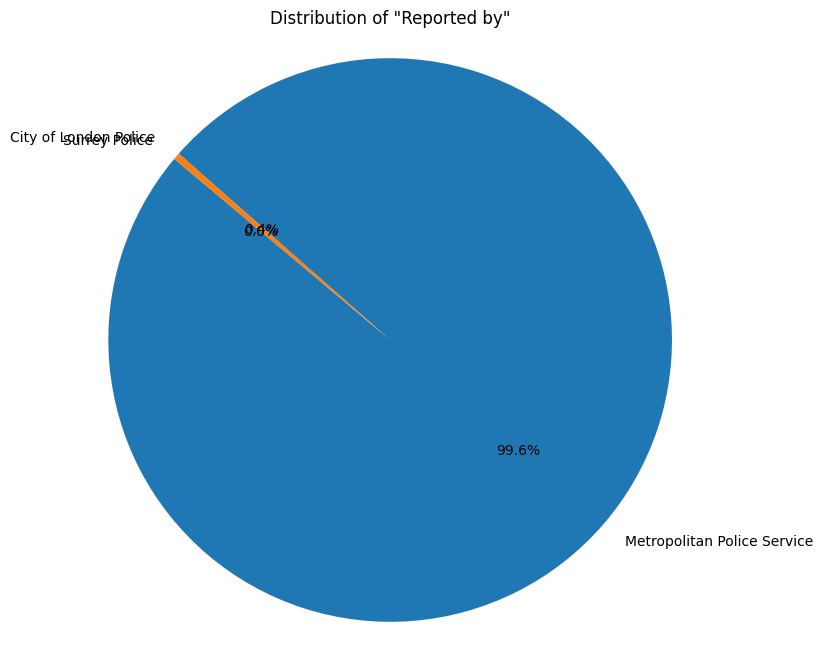

0.003870307666073908


In [71]:
report_counts = street['Reported by'].value_counts()
plt.figure(figsize=(8, 8))  # Optional: adjust figure size
plt.pie(report_counts, labels=report_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of "Reported by"')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle

# Show the plot
print(report_counts)
plt.show()

print(report_counts['City of London Police']/sum(report_counts))

##### Falls Within

In [72]:
street[street['Falls within'].isna() == True]

,Crime ID,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,Last outcome category,year,month


In [73]:
street['Falls within'].unique()

#Correct!

['City of London Police', 'Metropolitan Police Service']
Categories (2, object): ['City of London Police', 'Metropolitan Police Service']

Falls within
Metropolitan Police Service    1022291
City of London Police             3984
Name: count, dtype: int64


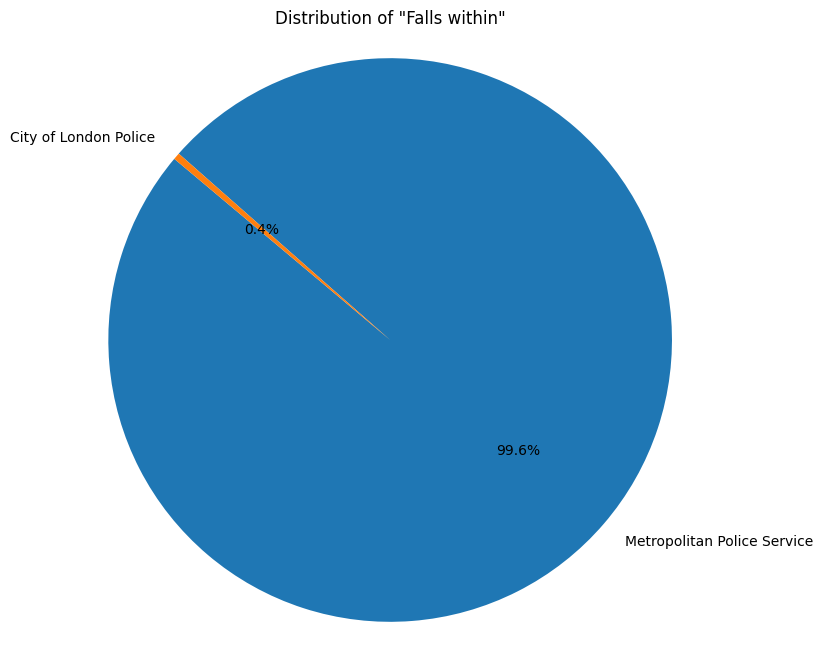

In [74]:
report_counts = street['Falls within'].value_counts()
plt.figure(figsize=(8, 8))  # Optional: adjust figure size
plt.pie(report_counts, labels=report_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of "Falls within"')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle

# Show the plot
print(report_counts)
plt.show()

##### Location

In [75]:
missing_location = street[street['Location'] == 'No Location']
total_rows = len(street)

print((len(missing_location)/total_rows)*100)
street['Location']

0.7327470707169131


0                On or near Monkwell Square
1                    On or near Fann Street
2          On or near Queen Victoria Street
3                       On or near Moorgate
4                On or near Finsbury Circus
                         ...               
1026270                    On or near A3212
1026271                 On or near Hospital
1026272                    On or near A3212
1026273           On or near Peabody Avenue
1026274          On or near Turpentine Lane
Name: Location, Length: 1026275, dtype: category
Categories (37692, object): ['No Location', 'On or near ', 'On or near A1', 'On or near A10', ..., 'On or near Zion Road', 'On or near Zoar Street', 'On or near Zodiac Close', 'On or near Zoffany Street']

In [76]:
report_counts = street['Location'].value_counts()
print(report_counts)

Location
On or near Supermarket               16643
On or near Parking Area              14451
On or near Sports/Recreation Area     9594
On or near Shopping Area              8516
On or near Petrol Station             8301
                                     ...  
On or near Saltley Close                 1
On or near Salt Hill Close               1
On or near Waterfront Drive              1
On or near Bellingham Green              1
On or near Coteford Close                1
Name: count, Length: 37692, dtype: int64


In [77]:
# Step 1: Filter rows where Location is 'No Location'
no_location_rows = street[street['Location'] == 'No Location']
num_no_location = len(no_location_rows)

# Step 2: Check for missing LSOA and missing Lat/Lon
has_lsoa = no_location_rows['LSOA code'].notna()
has_latlon = no_location_rows['Latitude'].notna() & no_location_rows['Longitude'].notna()

# Step 3: Report counts
num_with_lsoa = has_lsoa.sum()
num_with_latlon = has_latlon.sum()

print(f"Total rows with 'No Location': {num_no_location}")
print(f"Rows with 'No Location' that still have LSOA: {num_with_lsoa}")
print(f"Rows with 'No Location' that still have both Latitude and Longitude: {num_with_latlon}")

# Optional integrity check
if num_with_lsoa > 0 or num_with_latlon > 0:
    print("⚠️ Some 'No Location' entries still contain identifiable geographic information.")
else:
    print("✅ All 'No Location' entries are fully missing LSOA and coordinates.")


Total rows with 'No Location': 7520
Rows with 'No Location' that still have LSOA: 0
Rows with 'No Location' that still have both Latitude and Longitude: 0
✅ All 'No Location' entries are fully missing LSOA and coordinates.


##### LSOA Code

In [78]:
missing_lsoa = street[street['LSOA code'].isna()]
total_rows = len(street)

print((len(missing_lsoa)/total_rows)*100)

missing_lsoa

0.7327470707169131


,Crime ID,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,Last outcome category,year,month
79162,None,City of London Police,City of London Police,NaN,NaN,No Location,NaN,NaN,2011,10
159234,5f2b391ce5c92e44bef74f08e5b822f1f106a587873a33...,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,Investigation complete; no suspect identified,2012,7
159235,d784fa962f41381d3d9e68fce1637c5205c084c255c027...,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,Defendant found not guilty,2012,7
159236,d4d8ecdbd9926356ef0d557835059ce8ad3072a681be68...,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,Court case unable to proceed,2012,7
159237,5a8be478804ca8f0d7c76fd00b359e32dc875fb79fdbb0...,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,Investigation complete; no suspect identified,2012,7
...,...,...,...,...,...,...,...,...,...,...
1018055,24da073f43afbbffda0fe6ae9dac07d38fcb384975797e...,City of London Police,City of London Police,NaN,NaN,No Location,NaN,Investigation complete; no suspect identified,2025,1
1018056,cacd4f8162ee1a25732d40edea77e6cc150335eeb31bda...,City of London Police,City of London Police,NaN,NaN,No Location,NaN,Under investigation,2025,1
1018057,dce96dab6b6c4491a14bfa3704e5a96251ecd71941862b...,City of London Police,City of London Police,NaN,NaN,No Location,NaN,Under investigation,2025,1
1022534,2f32cb8e3d3fbba796187bddfaa511132bf535bc8fc644...,City of London Police,City of London Police,NaN,NaN,No Location,NaN,Under investigation,2025,2


##### Function for LSOA -> Ward & Borough

In [79]:
# Load the lookup CSV (adjust path if needed)
lookup_df = pd.read_csv("processed_data/LSOA_to_Ward_LAD_lookup.csv")

def get_ward_and_borough(lsoa_code):
    """
    Given an LSOA code (2021), return the corresponding (ward, borough).
    """
    row = lookup_df[lookup_df['LSOA21CD'] == lsoa_code]

    if not row.empty:
        ward = row.iloc[0]['WD24NM']
        borough = row.iloc[0]['LAD24NM']
        return ward, borough
    else:
        return None, None

# Example usage:
lsoa_example = "E01000001"  # Replace with a real code from your data
ward, borough = get_ward_and_borough(lsoa_example)
print(f"LSOA: {lsoa_example}\nWard: {ward}\nBorough: {borough}")


LSOA: E01000001
Ward: Aldersgate
Borough: City of London


LAD24NM
Barnet                    47221
Westminster               42513
Lambeth                   40318
Enfield                   38958
Croydon                   37372
Southwark                 37369
Ealing                    36735
Brent                     36145
Camden                    35930
Haringey                  35692
Hackney                   34337
Lewisham                  33589
Wandsworth                33574
Bromley                   32467
Redbridge                 32404
Islington                 31042
Hillingdon                29480
Waltham Forest            29337
Tower Hamlets             28803
Newham                    28090
Hounslow                  26541
Havering                  25529
Greenwich                 25257
Harrow                    23532
Kensington and Chelsea    22728
Hammersmith and Fulham    22711
Richmond upon Thames      21756
Barking and Dagenham      20753
Merton                    19498
Bexley                    17446
Sutton                    16469


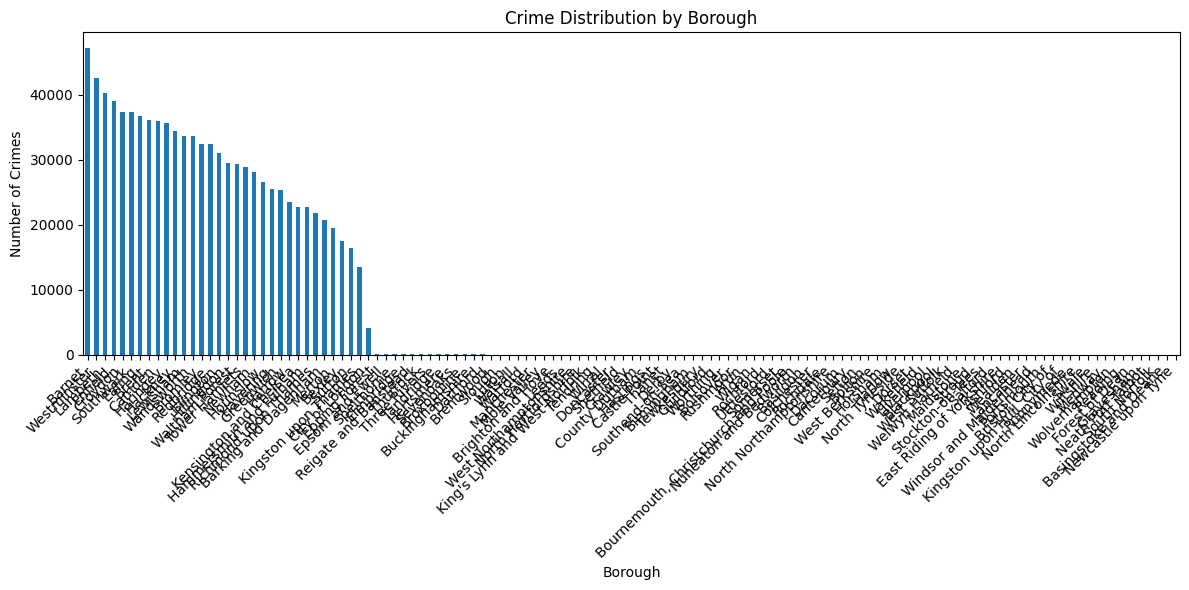

In [80]:
# 1. Load the LSOA-to-Borough lookup
lookup = pd.read_csv("processed_data/LSOA_to_Ward_LAD_lookup.csv")  # Update filename if needed

# 2. Merge 'street' with the lookup
# Make sure both DataFrames use the same LSOA code format
street_with_borough = street.merge(
    lookup[['LSOA21CD', 'LAD24NM']], 
    left_on='LSOA code', 
    right_on='LSOA21CD', 
    how='left'
)

# 3. Group by borough and count crimes
borough_counts = street_with_borough['LAD24NM'].value_counts()
print(borough_counts.head(50))

# 4. Plot as a bar chart
plt.figure(figsize=(12, 6))
borough_counts.plot(kind='bar')
plt.title("Crime Distribution by Borough")
plt.xlabel("Borough")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

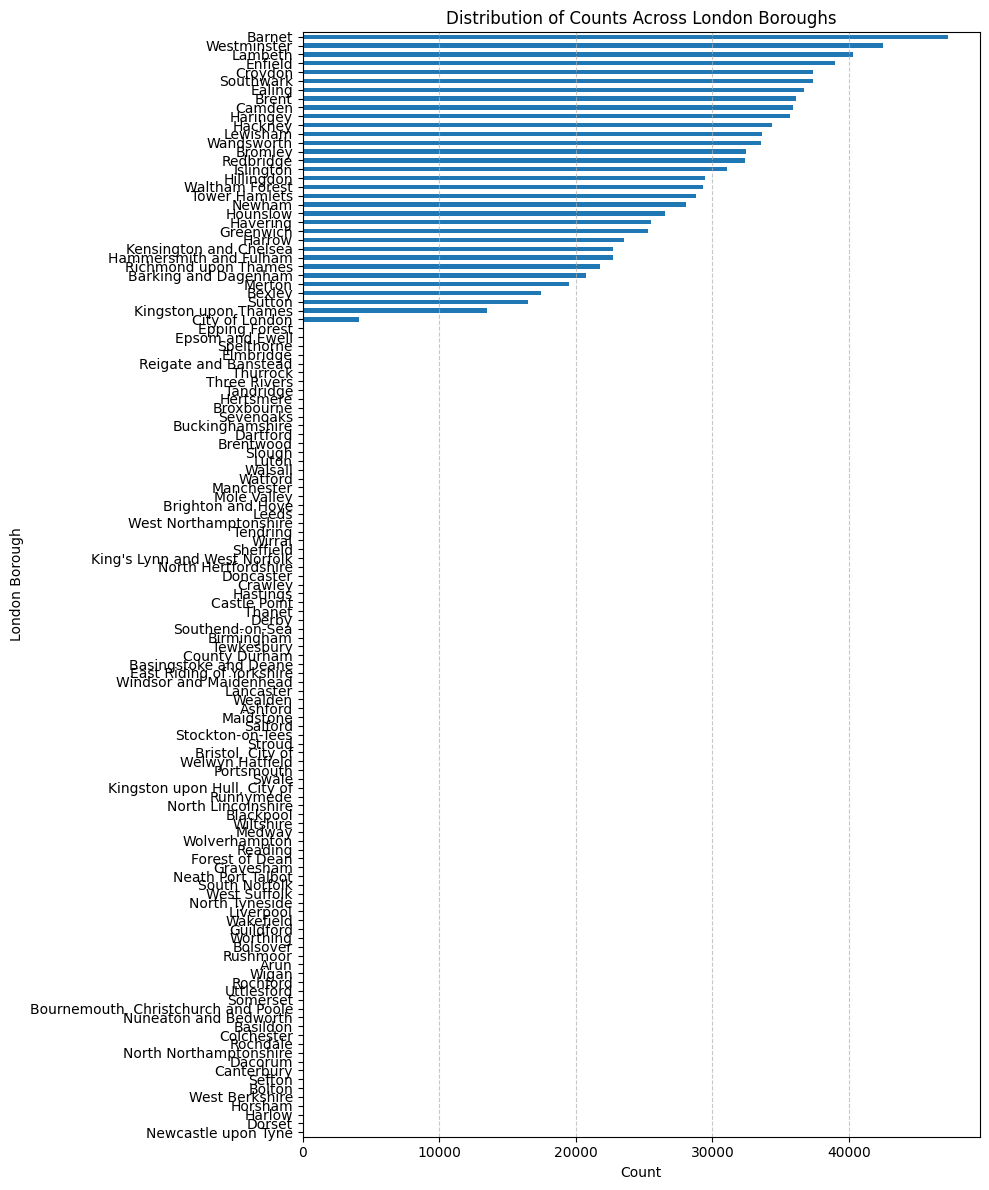

Barnet 47221
Westminster 42513
Lambeth 40318
Enfield 38958
Croydon 37372
Southwark 37369
Ealing 36735
Brent 36145
Camden 35930
Haringey 35692
Hackney 34337
Lewisham 33589
Wandsworth 33574
Bromley 32467
Redbridge 32404
Islington 31042
Hillingdon 29480
Waltham Forest 29337
Tower Hamlets 28803
Newham 28090
Hounslow 26541
Havering 25529
Greenwich 25257
Harrow 23532
Kensington and Chelsea 22728
Hammersmith and Fulham 22711
Richmond upon Thames 21756
Barking and Dagenham 20753
Merton 19498
Bexley 17446
Sutton 16469
Kingston upon Thames 13480
City of London 4091
Epping Forest 88
Epsom and Ewell 84
Spelthorne 46
Elmbridge 42
Reigate and Banstead 38
Thurrock 37
Three Rivers 29
Tandridge 27
Hertsmere 23
Sevenoaks 20
Broxbourne 20
Buckinghamshire 17
Dartford 14
Brentwood 8
Slough 7
Luton 4
Walsall 4
Watford 3
Manchester 3
Mole Valley 3
Brighton and Hove 3
Leeds 3
West Northamptonshire 3
North Hertfordshire 2
King's Lynn and West Norfolk 2
Tendring 2
Wirral 2
Doncaster 2
Sheffield 2
Crawley 2
Coun

In [81]:
import matplotlib.pyplot as plt

# Assuming you have your data as a pandas Series named `borough_counts`
borough_counts.sort_values().plot(kind='barh', figsize=(10, 12))

plt.xlabel('Count')
plt.ylabel('London Borough')
plt.title('Distribution of Counts Across London Boroughs')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

for index, value in borough_counts.items():
    print(index, value)


##### Last Outcome

In [21]:
missing_lsoa = street[street['Last outcome category'].isna()]
total_rows = len(street)

print((len(missing_lsoa)/total_rows)*100)

missing_lsoa

11.732820150544445


,Crime ID,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,Last outcome category,year,month
0,None,City of London Police,City of London Police,-0.093948,51.518078,On or near Monkwell Square,E01000002,NaN,2010,12
1,None,City of London Police,City of London Police,-0.095860,51.521660,On or near Fann Street,E01000003,NaN,2010,12
2,None,City of London Police,City of London Police,-0.092719,51.512653,On or near Queen Victoria Street,E01032739,NaN,2010,12
3,None,City of London Police,City of London Police,-0.088203,51.518261,On or near Moorgate,E01032739,NaN,2010,12
4,None,City of London Police,City of London Police,-0.086724,51.517445,On or near Finsbury Circus,E01032739,NaN,2010,12
...,...,...,...,...,...,...,...,...,...,...
129015,cdba6d85a572eb3b3297f9ff1fcbaf4cd71eb0e08d967a...,Metropolitan Police Service,Metropolitan Police Service,-0.144724,51.492615,On or near Hugh Mews,E01004750,NaN,2012,3
129020,ce16635f2ab67fd1e2633ae78842696dcf1362b29f543c...,Metropolitan Police Service,Metropolitan Police Service,-0.142261,51.487648,On or near Lupus Street,E01004665,NaN,2012,3
129021,a576db418618e92590a2266dff30468b7f30fbdea6960d...,Metropolitan Police Service,Metropolitan Police Service,-0.142868,51.486874,On or near Glasgow Terrace,E01004665,NaN,2012,3
129022,29618e04ccf88e76aa7f091c8b465f89a30adc52013d1e...,Metropolitan Police Service,Metropolitan Police Service,-0.142868,51.486874,On or near Glasgow Terrace,E01004665,NaN,2012,3


Last outcome category
Investigation complete; no suspect identified          462785
Under investigation                                    202593
Status update unavailable                              177976
Court result unavailable                                19877
Offender sent to prison                                  9322
Unable to prosecute suspect                              7352
Awaiting court outcome                                   6633
Suspect charged as part of another case                  5922
Defendant found not guilty                               3966
Offender given suspended prison sentence                 2612
Offender given community sentence                        2361
Court case unable to proceed                             1590
Offender given a caution                                 1317
Local resolution                                          492
Offender fined                                            361
Offender given conditional discharge            

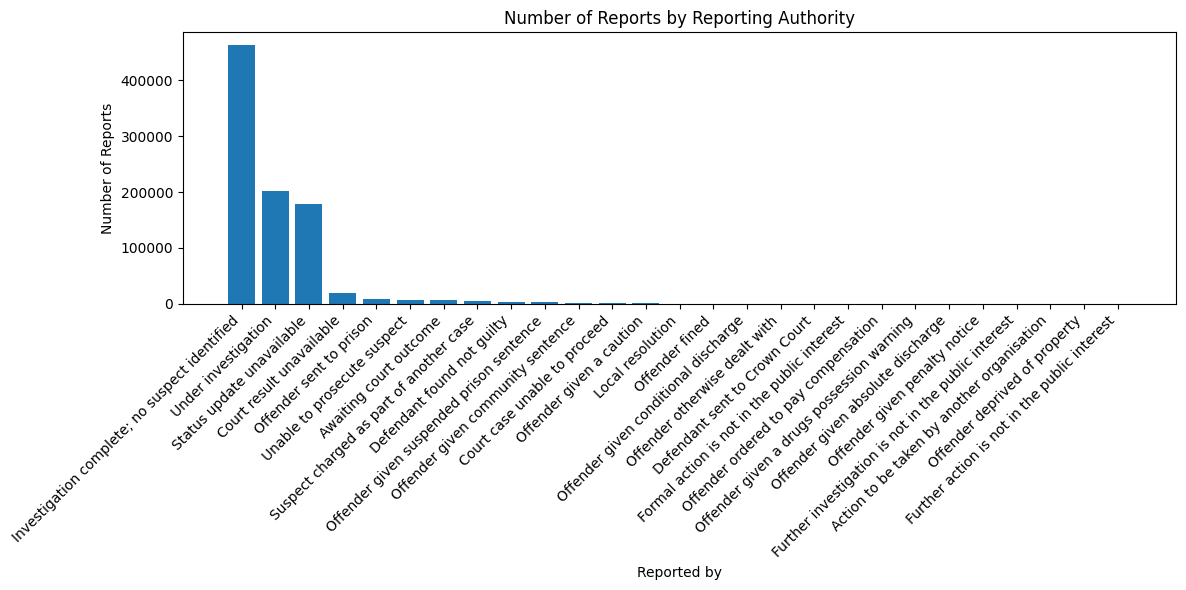

In [22]:
report_counts = street['Last outcome category'].value_counts()
print(report_counts)

plt.figure(figsize=(12, 6))  # Wider for label clarity
plt.bar(report_counts.index, report_counts.values)

# Labeling
plt.title('Number of Reports by Reporting Authority')
plt.xlabel('Reported by')
plt.ylabel('Number of Reports')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for readability
plt.tight_layout()

##### Year

In [23]:
missing_lsoa = street[street['year'].isna()]
total_rows = len(street)

print((len(missing_lsoa)/total_rows)*100)

missing_lsoa

0.0


,Crime ID,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,Last outcome category,year,month


year
2011    96170
2012    94998
2013    88277
2018    80948
2019    79581
2014    76504
2017    76095
2015    70796
2016    68565
2020    61245
2023    56573
2022    53926
2021    53567
2024    52885
2025     8240
2010     7905
Name: count, dtype: int64


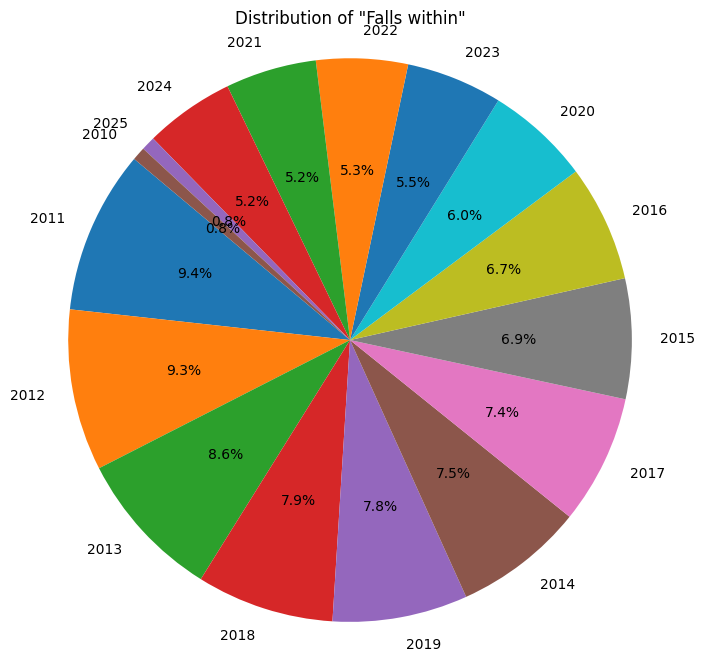

In [24]:
report_counts = street['year'].value_counts()
report_counts

plt.figure(figsize=(8, 8))  # Optional: adjust figure size
plt.pie(report_counts, labels=report_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of "Falls within"')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle

# Show the plot
print(report_counts)
plt.show()

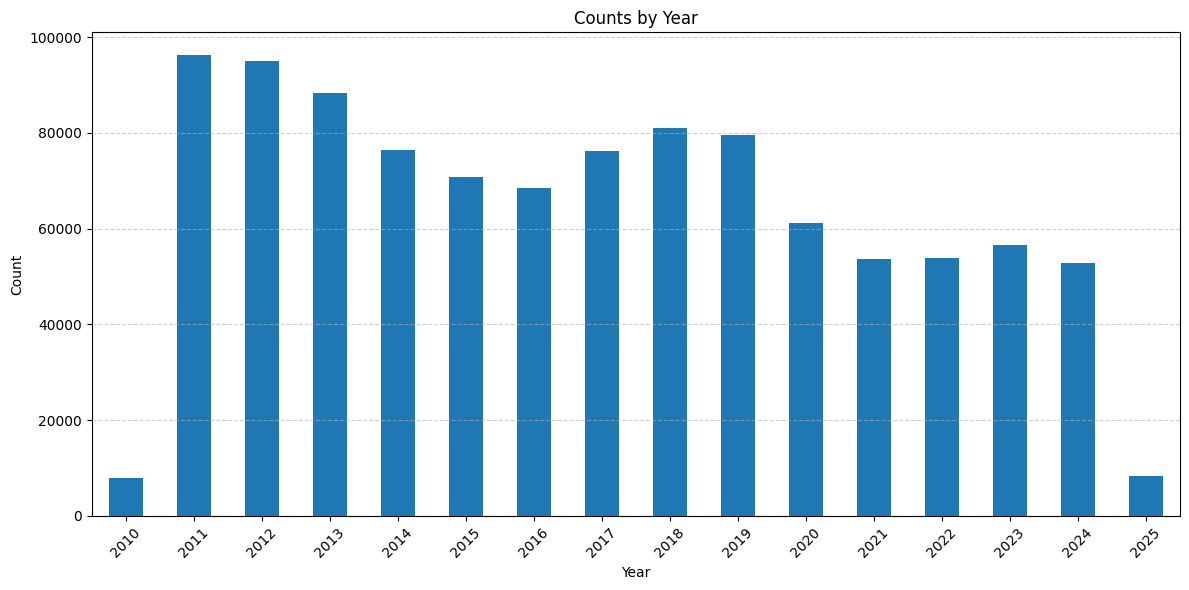

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data as a dictionary
data = {
    2011: 96170, 2012: 94998, 2013: 88277, 2018: 80948, 2019: 79581,
    2014: 76504, 2017: 76095, 2015: 70796, 2016: 68565, 2020: 61245,
    2023: 56573, 2022: 53926, 2021: 53567, 2024: 52885, 2025: 8240,
    2010: 7905
}

# Convert to a DataFrame for sorting and plotting
df = pd.Series(data).sort_index()  # Sort by year
df.plot(kind='bar', figsize=(12, 6))

# Add labels and grid
plt.title('Counts by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


##### Month

month
1     99708
12    97177
11    91677
2     88776
3     87903
10    87351
8     80810
5     79438
9     78810
7     78747
4     78423
6     77455
Name: count, dtype: int64


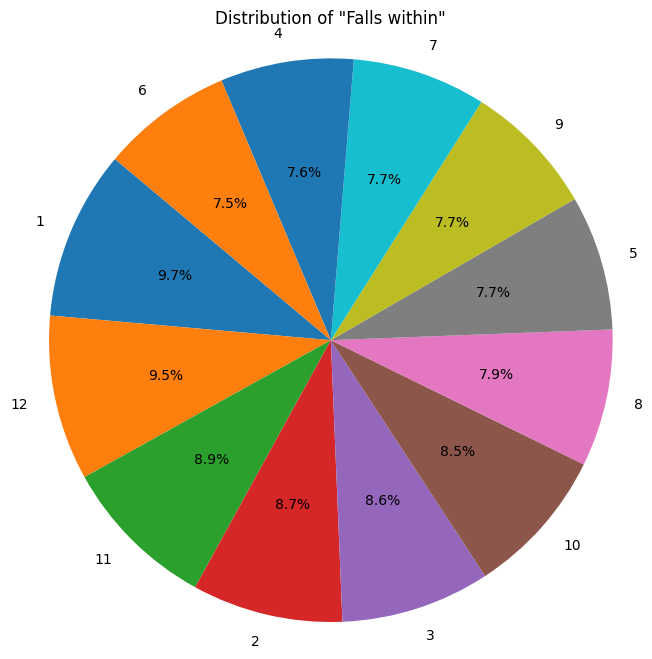

In [26]:
report_counts = street['month'].value_counts()
report_counts

plt.figure(figsize=(8, 8))  # Optional: adjust figure size
plt.pie(report_counts, labels=report_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of "Falls within"')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle

# Show the plot
print(report_counts)
plt.show()

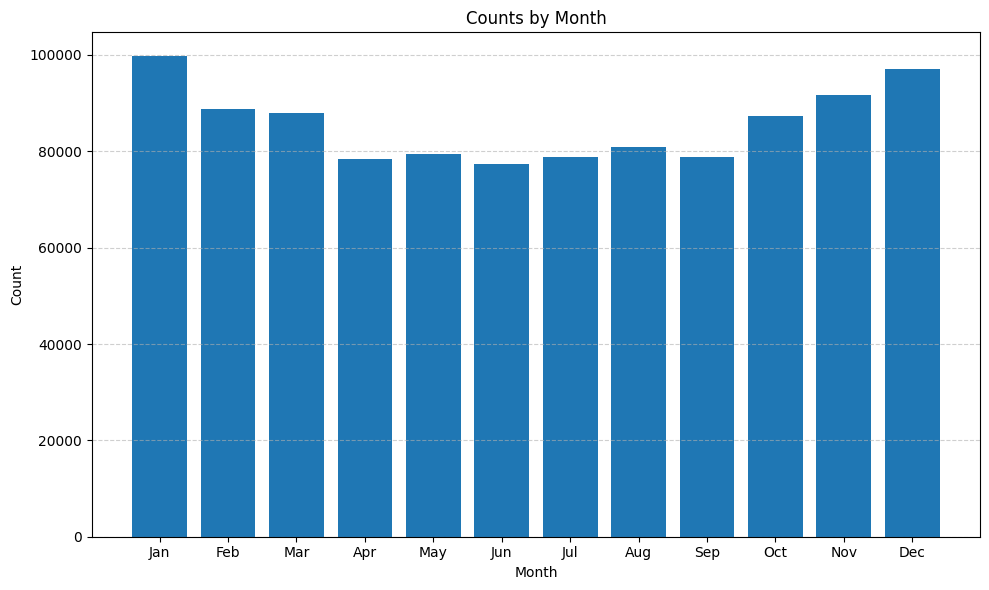

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Raw data
month_data = {
    1: 99708, 12: 97177, 11: 91677, 2: 88776, 3: 87903, 10: 87351,
    8: 80810, 5: 79438, 9: 78810, 7: 78747, 4: 78423, 6: 77455
}

# Convert to Series and sort by month
month_series = pd.Series(month_data).sort_index()

# Month labels
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot
plt.figure(figsize=(10, 6))
plt.bar(month_labels, month_series.values)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Counts by Month')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## EDA on Outcomes

##### Crime ID

In [28]:
outcomes[outcomes['Crime ID'].isna()]

# Filter rows where 'Crime ID' is not a string
non_string_crime_ids = outcomes[~outcomes['Crime ID'].apply(lambda x: isinstance(x, str))]

non_string_crime_ids

,Crime ID,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,Outcome type,year,month


In [29]:
outcomes

,Crime ID,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,Outcome type,year,month
0,304b04e53541a86ff07c6f8352e930428fba497cca4fc7...,Metropolitan Police Service,Metropolitan Police Service,-0.178993,51.553707,On or near ELLERDALE ROAD,E01000879,Offender sent to prison,2012,1
1,f6a5595f6f168469acd98fefdaa9b6964984d45d06c3c8...,Metropolitan Police Service,Metropolitan Police Service,-0.080807,51.525517,On or near MILLS COURT,E01033708,Offender given suspended prison sentence,2012,1
2,d15197615c1b0ebe85e4c2bfc5d7411c3af69fabab859f...,Metropolitan Police Service,Metropolitan Police Service,0.072637,51.574352,On or near LYNTON CRESCENT,E01003752,Offender given community sentence,2012,1
3,5d3a6821f33a7678aaf3ba015effbd340b320b46fcdc00...,Metropolitan Police Service,Metropolitan Police Service,0.026158,51.478680,On or near COUTHURST ROAD,E01001593,Offender given community sentence,2012,1
4,d2969bdf720e37e94e7aaec7f91f7b8805c15057568729...,Metropolitan Police Service,Metropolitan Police Service,-0.131416,51.510857,On or near Parking Area,E01004734,Offender given community sentence,2012,1
...,...,...,...,...,...,...,...,...,...,...
691581,266260c2a7ee268805d5173964ceb8cfed72cd9da6518f...,Metropolitan Police Service,Metropolitan Police Service,-0.248918,51.516285,On or near Foliot Street,E01001878,Suspect charged,2025,2
691582,266260c2a7ee268805d5173964ceb8cfed72cd9da6518f...,Metropolitan Police Service,Metropolitan Police Service,-0.248918,51.516285,On or near Foliot Street,E01001878,Suspect charged,2025,2
691583,87427f19e35255d56f833048e73145c92bb4c13770a20a...,Metropolitan Police Service,Metropolitan Police Service,-0.173058,51.468502,On or near Wolftencroft Close,E01004541,Suspect charged,2025,2
691584,87427f19e35255d56f833048e73145c92bb4c13770a20a...,Metropolitan Police Service,Metropolitan Police Service,-0.173058,51.468502,On or near Wolftencroft Close,E01004541,Suspect charged,2025,2


In [30]:
# Step 1: Get the 'Crime ID' values from each DataFrame
outcomes_ids = outcomes['Crime ID']
street_ids = street['Crime ID']

# Step 2: Check if all outcomes IDs are in the street DataFrame
all_ids_match = outcomes_ids.isin(street_ids)

# Step 3: Evaluate the result
if all(all_ids_match):
    print("✅ All 'Crime ID's in 'outcomes' exist in 'street'.")
else:
    missing_ids = outcomes_ids[~all_ids_match]
    print(f"⚠️ {len(missing_ids)} 'Crime ID's in 'outcomes' are missing from 'street'.")
    print("Here are some missing IDs:")
    print(missing_ids.unique()[:10])  # show a sample


✅ All 'Crime ID's in 'outcomes' exist in 'street'.


##### Longitude and Latitude

In [31]:
print(len(outcomes[outcomes['Longitude'].isna()]),'longitude missing')
print(len(outcomes[outcomes['Latitude'].isna()]),'longitude missing')

outcomes[outcomes['Longitude'].isna()]

6990 longitude missing
6990 longitude missing


,Crime ID,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,Outcome type,year,month
16282,1953d791d4066d0e22045c46ac0181379c767959a05fc1...,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No location,NaN,Suspect charged,2012,7
16431,f2e92e7d03017bc5c4165abe99ebf34dc9195549fdbdf5...,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No location,NaN,Investigation complete; no suspect identified,2012,7
16799,79efe8f043dd8637fc4eec281f842add45f178e6ac6856...,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No location,NaN,Investigation complete; no suspect identified,2012,7
17136,80371d97455ae20abd61cd14f0169f5e3e5b01d16212d0...,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No location,NaN,Investigation complete; no suspect identified,2012,7
17393,1a40ae84bf0f297d916eba7560153fc07dbf219b2f28c3...,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No location,NaN,Investigation complete; no suspect identified,2012,7
...,...,...,...,...,...,...,...,...,...,...
686580,389d0ce0f599777094352afa1df124d5539a1063eb3435...,City of London Police,City of London Police,NaN,NaN,No location,NaN,Suspect charged,2025,2
687149,d999304204f19f28b92428b472233878a2b5669b4fc14a...,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No location,NaN,Unable to prosecute suspect,2025,2
689023,36bf4fec0e1ec7440bd6d5da0f3231d88435d2aafa1d5a...,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No location,NaN,Investigation complete; no suspect identified,2025,2
689875,2eab5713d646cee7fe82da79e2bec497a383ff07078a64...,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No location,NaN,Investigation complete; no suspect identified,2025,2


In [32]:
outcomes[outcomes['Longitude'].isna() & outcomes['LSOA code'].isna()]

,Crime ID,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,Outcome type,year,month
16282,1953d791d4066d0e22045c46ac0181379c767959a05fc1...,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No location,NaN,Suspect charged,2012,7
16431,f2e92e7d03017bc5c4165abe99ebf34dc9195549fdbdf5...,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No location,NaN,Investigation complete; no suspect identified,2012,7
16799,79efe8f043dd8637fc4eec281f842add45f178e6ac6856...,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No location,NaN,Investigation complete; no suspect identified,2012,7
17136,80371d97455ae20abd61cd14f0169f5e3e5b01d16212d0...,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No location,NaN,Investigation complete; no suspect identified,2012,7
17393,1a40ae84bf0f297d916eba7560153fc07dbf219b2f28c3...,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No location,NaN,Investigation complete; no suspect identified,2012,7
...,...,...,...,...,...,...,...,...,...,...
686580,389d0ce0f599777094352afa1df124d5539a1063eb3435...,City of London Police,City of London Police,NaN,NaN,No location,NaN,Suspect charged,2025,2
687149,d999304204f19f28b92428b472233878a2b5669b4fc14a...,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No location,NaN,Unable to prosecute suspect,2025,2
689023,36bf4fec0e1ec7440bd6d5da0f3231d88435d2aafa1d5a...,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No location,NaN,Investigation complete; no suspect identified,2025,2
689875,2eab5713d646cee7fe82da79e2bec497a383ff07078a64...,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No location,NaN,Investigation complete; no suspect identified,2025,2


In [33]:
# Step 1: Check where only one of the two columns is missing
longitude_missing = outcomes['Longitude'].isna()
latitude_missing = outcomes['Latitude'].isna()

# Step 2: Identify rows where only one of them is missing
only_one_missing = (longitude_missing != latitude_missing)

# Step 3: Summarize the result
num_only_one_missing = only_one_missing.sum()

if num_only_one_missing == 0:
    print("✅ All rows with missing values in 'Longitude' or 'Latitude' are missing in BOTH.")
else:
    print(f"⚠️ There are {num_only_one_missing} rows where only one of 'Longitude' or 'Latitude' is missing.")
    print("Sample of such rows:")
    display(outcomes[only_one_missing].head())


✅ All rows with missing values in 'Longitude' or 'Latitude' are missing in BOTH.


In [35]:
# Step 1: Identify rows where BOTH Latitude and Longitude are missing
missing_both = outcomes['Longitude'].isna() & outcomes['Latitude'].isna()

# Step 2: Count those rows
num_missing_both = missing_both.sum()

print(f"🔎 Number of rows missing both 'Longitude' and 'Latitude': {num_missing_both}")

print((num_missing_both/len(outcomes))*100, 'perc')

🔎 Number of rows missing both 'Longitude' and 'Latitude': 6990
1.0107202864141263 perc


##### Crime ID - Missing Values

In [22]:
no_missing_rows = len(outcomes[outcomes['Crime ID'].isna()])
initial_rows = len(outcomes)
official_rows = initial_rows-no_missing_rows

print(initial_rows, 'total number initial rows')
print(no_missing_rows, 'number rows that have CrimeID missing (unidentifiable)')
print(no_missing_rows/initial_rows*100, '% percentage of rows that are missing CrimeID')

print(official_rows, 'number of rows that contain CrimeID')
print()

691586 total number initial rows
0 number rows that have CrimeID missing (unidentifiable)
0.0 % percentage of rows that are missing CrimeID
691586 number of rows that contain CrimeID



##### Reported By

In [36]:
outcomes[outcomes['Reported by'].isna()]

# All crimes have a value in Reported By

,Crime ID,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,Outcome type,year,month


In [24]:
outcomes['Reported by'].unique()

['Metropolitan Police Service', 'City of London Police']
Categories (2, object): ['City of London Police', 'Metropolitan Police Service']

In [38]:
report_counts = outcomes['Reported by'].value_counts()
print(report_counts)

Reported by
Metropolitan Police Service    687898
City of London Police            3688
Name: count, dtype: int64


##### Falls Within

In [40]:
outcomes[outcomes['Falls within'].isna()]

,Crime ID,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,Outcome type,year,month


In [41]:
outcomes['Falls within'].unique()

#Correct!

['Metropolitan Police Service', 'City of London Police']
Categories (2, object): ['City of London Police', 'Metropolitan Police Service']

In [42]:
report_counts = outcomes['Falls within'].value_counts()
print(report_counts)

Falls within
Metropolitan Police Service    687898
City of London Police            3688
Name: count, dtype: int64


In [43]:
# Step 1: Create a boolean Series for mismatches between the two columns
mismatch = outcomes['Reported by'] != outcomes['Falls within']

# Step 2: Filter only rows where a mismatch occurs
mismatch_rows = outcomes[mismatch]

# Step 3: Count and inspect
num_mismatches = len(mismatch_rows)

if num_mismatches == 0:
    print("✅ All 'Reported by' values match the corresponding 'Falls within' values for both police services.")
else:
    print(f"⚠️ Found {num_mismatches} rows where 'Reported by' and 'Falls within' do not match.")
    print("Sample of mismatched rows:")
    print(mismatch_rows[['Reported by', 'Falls within']].drop_duplicates())


✅ All 'Reported by' values match the corresponding 'Falls within' values for both police services.


Falls within
Metropolitan Police Service    687898
City of London Police            3688
Name: count, dtype: int64


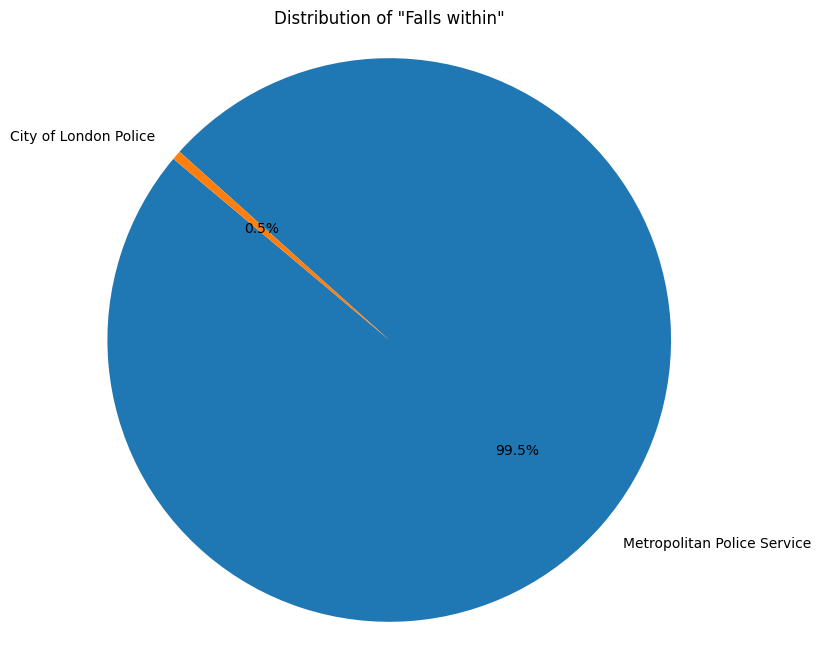

In [27]:
report_counts = outcomes['Falls within'].value_counts()
plt.figure(figsize=(8, 8))  # Optional: adjust figure size
plt.pie(report_counts, labels=report_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of "Falls within"')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle

# Show the plot
print(report_counts)
plt.show()

##### LSOA

In [44]:
outcomes[outcomes['LSOA code'].isna()]

,Crime ID,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,Outcome type,year,month
16282,1953d791d4066d0e22045c46ac0181379c767959a05fc1...,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No location,NaN,Suspect charged,2012,7
16431,f2e92e7d03017bc5c4165abe99ebf34dc9195549fdbdf5...,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No location,NaN,Investigation complete; no suspect identified,2012,7
16799,79efe8f043dd8637fc4eec281f842add45f178e6ac6856...,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No location,NaN,Investigation complete; no suspect identified,2012,7
17136,80371d97455ae20abd61cd14f0169f5e3e5b01d16212d0...,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No location,NaN,Investigation complete; no suspect identified,2012,7
17393,1a40ae84bf0f297d916eba7560153fc07dbf219b2f28c3...,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No location,NaN,Investigation complete; no suspect identified,2012,7
...,...,...,...,...,...,...,...,...,...,...
686580,389d0ce0f599777094352afa1df124d5539a1063eb3435...,City of London Police,City of London Police,NaN,NaN,No location,NaN,Suspect charged,2025,2
687149,d999304204f19f28b92428b472233878a2b5669b4fc14a...,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No location,NaN,Unable to prosecute suspect,2025,2
689023,36bf4fec0e1ec7440bd6d5da0f3231d88435d2aafa1d5a...,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No location,NaN,Investigation complete; no suspect identified,2025,2
689875,2eab5713d646cee7fe82da79e2bec497a383ff07078a64...,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No location,NaN,Investigation complete; no suspect identified,2025,2


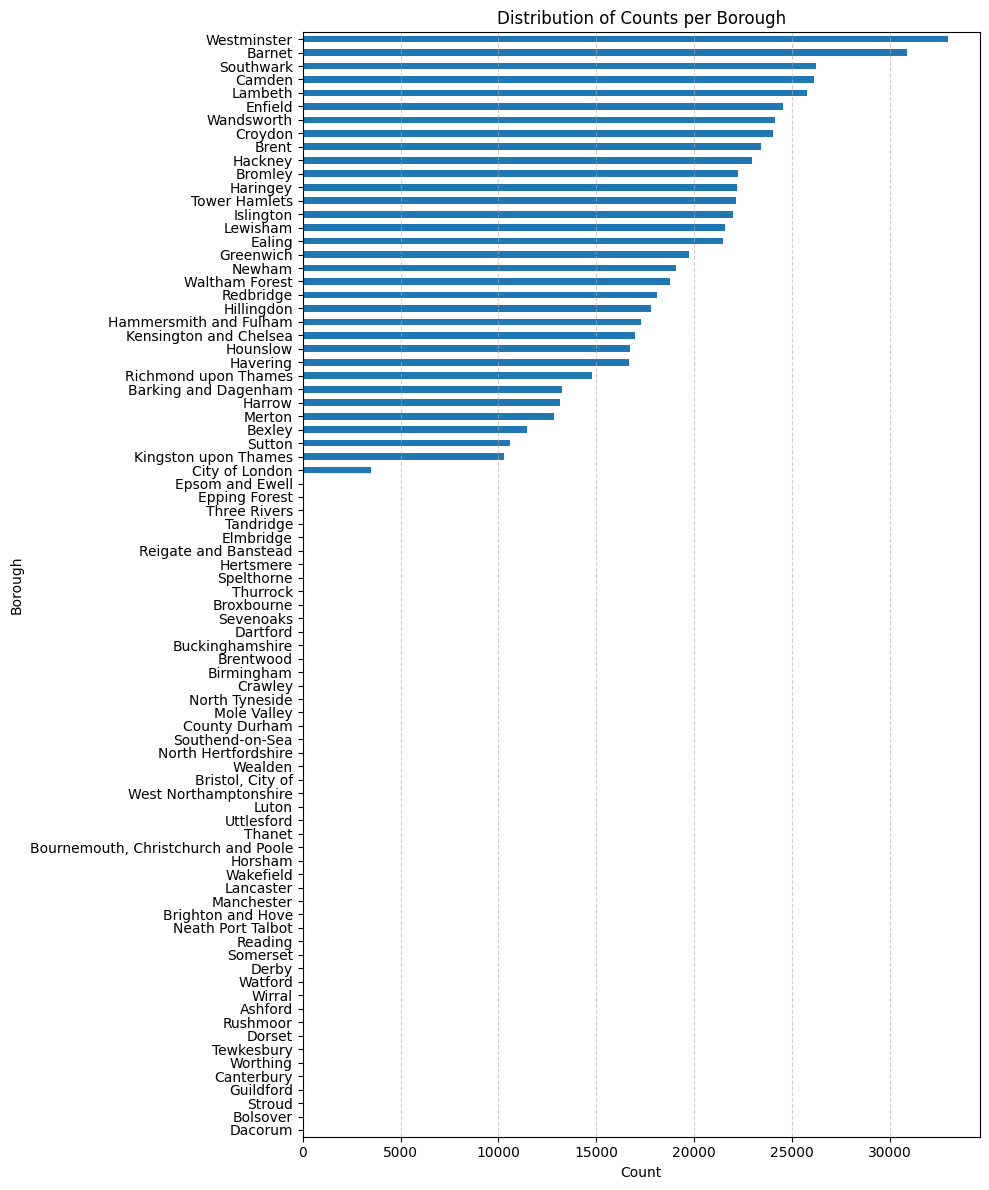

644003
691586


In [53]:
# 1. Load the LSOA-to-Borough lookup
lookup = pd.read_csv("processed_data/LSOA_to_Ward_LAD_lookup.csv")  # Update filename if needed

# 2. Merge 'street' with the lookup
# Make sure both DataFrames use the same LSOA code format
outcomes_with_borough = outcomes.merge(
    lookup[['LSOA21CD', 'LAD24NM']], 
    left_on='LSOA code', 
    right_on='LSOA21CD', 
    how='left'
)

# 3. Group by borough and count crimes
borough_counts = outcomes_with_borough['LAD24NM'].value_counts()
# Sort values for better visual impact
borough_counts_sorted = borough_counts.sort_values()

# Plot
plt.figure(figsize=(10, 12))
borough_counts_sorted.plot(kind='barh')

# Customize plot
plt.xlabel('Count')
plt.ylabel('Borough')
plt.title('Distribution of Counts per Borough')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print(borough_counts_sorted.sum())
print(len(outcomes))

In [59]:
for index, value in borough_counts_sorted.items():
    print(index, value)

Dacorum 1
Bolsover 1
Stroud 1
Guildford 1
Canterbury 1
Worthing 1
Tewkesbury 1
Dorset 1
Rushmoor 1
Ashford 1
Wirral 1
Watford 1
Derby 1
Somerset 1
Reading 1
Neath Port Talbot 1
Brighton and Hove 1
Manchester 1
Lancaster 1
Wakefield 1
Horsham 1
Bournemouth, Christchurch and Poole 1
Thanet 1
Uttlesford 1
Luton 2
West Northamptonshire 2
Bristol, City of 2
Wealden 2
North Hertfordshire 2
Southend-on-Sea 3
County Durham 3
Mole Valley 3
North Tyneside 3
Crawley 4
Birmingham 7
Brentwood 7
Buckinghamshire 7
Dartford 9
Sevenoaks 11
Broxbourne 13
Thurrock 15
Spelthorne 21
Hertsmere 22
Reigate and Banstead 25
Elmbridge 26
Tandridge 28
Three Rivers 28
Epping Forest 54
Epsom and Ewell 57
City of London 3472
Kingston upon Thames 10279
Sutton 10599
Bexley 11472
Merton 12843
Harrow 13154
Barking and Dagenham 13272
Richmond upon Thames 14799
Havering 16681
Hounslow 16718
Kensington and Chelsea 16952
Hammersmith and Fulham 17263
Hillingdon 17803
Redbridge 18082
Waltham Forest 18772
Newham 19082
Greenwic

In [55]:
# Count how many rows have no matched borough after merge
num_missing_boroughs = outcomes_with_borough['LAD24NM'].isna().sum()

print(f"⚠️ Number of crimes with no matched borough: {num_missing_boroughs}")

print((num_missing_boroughs/len(outcomes))*100)

⚠️ Number of crimes with no matched borough: 47583
6.880272301637107


##### Last Outcome (Outcome Type)

In [83]:
outcomes[outcomes['Outcome type'].isna()]

,Crime ID,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,Outcome type,year,month


Outcome type
Investigation complete; no suspect identified          582339
Suspect charged                                         62317
Offender sent to prison                                 11976
Unable to prosecute suspect                              8972
Suspect charged as part of another case                  7370
Defendant found not guilty                               5242
Offender given community sentence                        3440
Offender given suspended prison sentence                 3439
Court case unable to proceed                             2294
Offender given a caution                                 1800
Local resolution                                          800
Offender fined                                            536
Offender given conditional discharge                      407
Offender otherwise dealt with                             186
Defendant sent to Crown Court                             135
Formal action is not in the public interest              

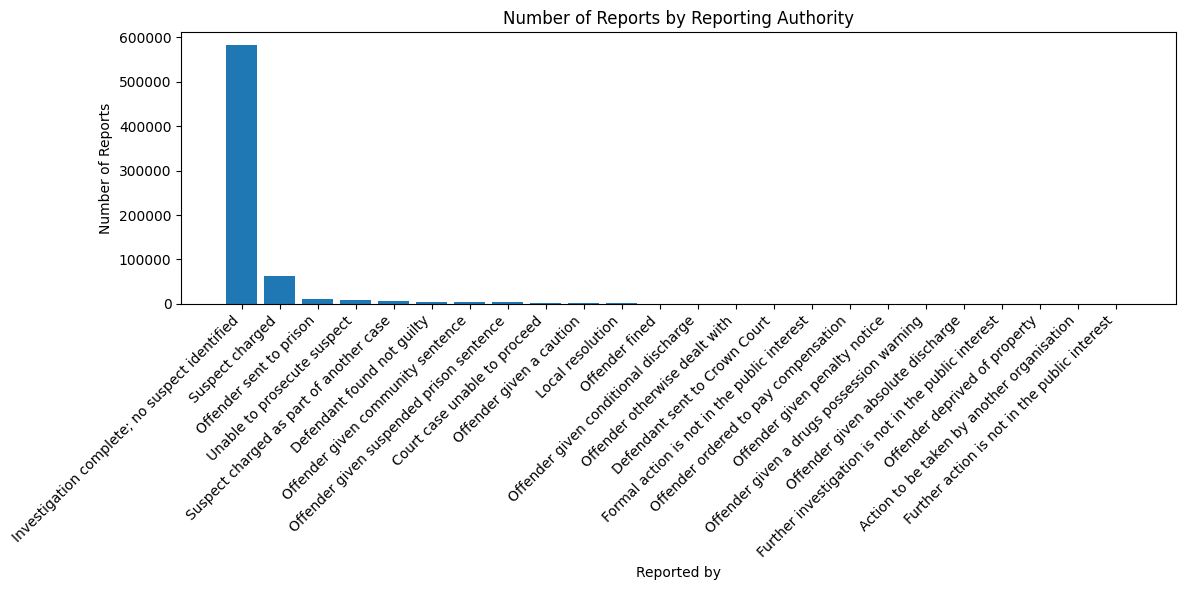

In [29]:
report_counts = outcomes['Outcome type'].value_counts()
print(report_counts)

plt.figure(figsize=(12, 6))  # Wider for label clarity
plt.bar(report_counts.index, report_counts.values)

# Labeling
plt.title('Number of Reports by Reporting Authority')
plt.xlabel('Reported by')
plt.ylabel('Number of Reports')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for readability
plt.tight_layout()

##### Location

In [87]:
outcomes[outcomes['Location'] == 'No location']

,Crime ID,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,Outcome type,year,month
16282,1953d791d4066d0e22045c46ac0181379c767959a05fc1...,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No location,NaN,Suspect charged,2012,7
16431,f2e92e7d03017bc5c4165abe99ebf34dc9195549fdbdf5...,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No location,NaN,Investigation complete; no suspect identified,2012,7
16799,79efe8f043dd8637fc4eec281f842add45f178e6ac6856...,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No location,NaN,Investigation complete; no suspect identified,2012,7
17136,80371d97455ae20abd61cd14f0169f5e3e5b01d16212d0...,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No location,NaN,Investigation complete; no suspect identified,2012,7
17393,1a40ae84bf0f297d916eba7560153fc07dbf219b2f28c3...,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No location,NaN,Investigation complete; no suspect identified,2012,7
...,...,...,...,...,...,...,...,...,...,...
686580,389d0ce0f599777094352afa1df124d5539a1063eb3435...,City of London Police,City of London Police,NaN,NaN,No location,NaN,Suspect charged,2025,2
687149,d999304204f19f28b92428b472233878a2b5669b4fc14a...,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No location,NaN,Unable to prosecute suspect,2025,2
689023,36bf4fec0e1ec7440bd6d5da0f3231d88435d2aafa1d5a...,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No location,NaN,Investigation complete; no suspect identified,2025,2
689875,2eab5713d646cee7fe82da79e2bec497a383ff07078a64...,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No location,NaN,Investigation complete; no suspect identified,2025,2


In [88]:
report_counts = outcomes['Location'].value_counts()
print(report_counts)

Location
On or near Supermarket               14570
On or near Parking Area              11798
On or near Shopping Area              7793
No location                           6990
On or near Sports/Recreation Area     6652
                                     ...  
On or near Caxton Way                    1
On or near Cayley Close                  1
On or near HILLSIDE DRIVE                1
On or near Cecil Grove                   1
On or near KENDRICK MEWS                 1
Name: count, Length: 61590, dtype: int64


##### Year

year
2013    84266
2023    79987
2020    71228
2024    63538
2014    60357
2015    54604
2021    46823
2017    45929
2012    42756
2016    42380
2022    40485
2018    37474
2025    11284
2019    10475
Name: count, dtype: int64


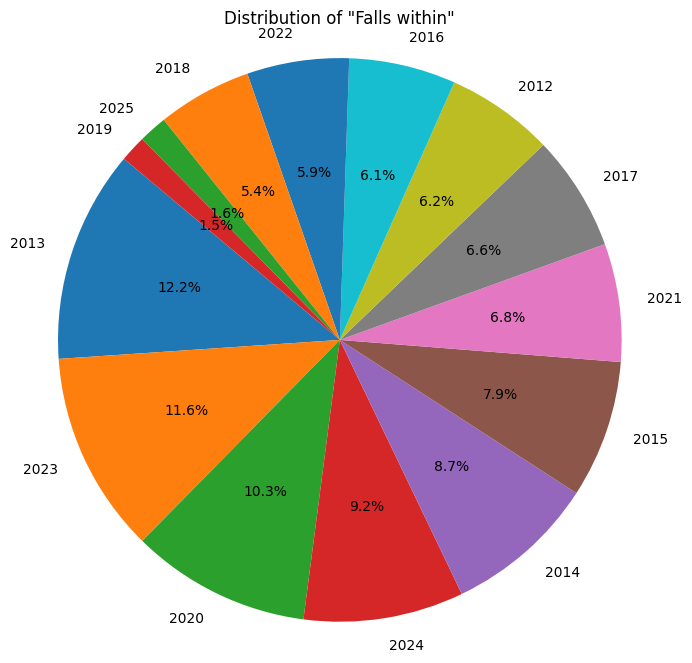

In [30]:
report_counts = outcomes['year'].value_counts()
report_counts

plt.figure(figsize=(8, 8))  # Optional: adjust figure size
plt.pie(report_counts, labels=report_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of "Falls within"')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle

# Show the plot
print(report_counts)
plt.show()

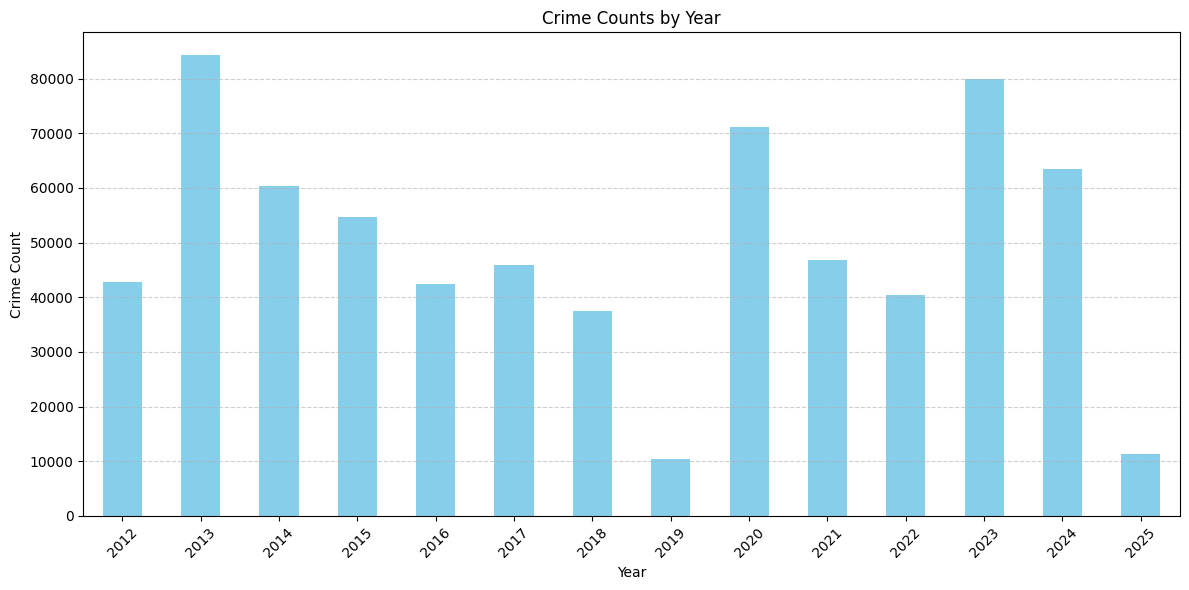

2012    42756
2013    84266
2014    60357
2015    54604
2016    42380
2017    45929
2018    37474
2019    10475
2020    71228
2021    46823
2022    40485
2023    79987
2024    63538
2025    11284
dtype: int64


In [90]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is stored in a Series named 'year_counts'
year_counts = pd.Series({
    2013: 84266, 2023: 79987, 2020: 71228, 2024: 63538,
    2014: 60357, 2015: 54604, 2021: 46823, 2017: 45929,
    2012: 42756, 2016: 42380, 2022: 40485, 2018: 37474,
    2025: 11284, 2019: 10475
})

# Sort by year for readability
year_counts_sorted = year_counts.sort_index()

# Plot
plt.figure(figsize=(12, 6))
year_counts_sorted.plot(kind='bar', color='skyblue')

# Customize chart
plt.title('Crime Counts by Year')
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print(year_counts_sorted)


##### Month

month
1     78684
2     64371
4     61918
10    60327
11    55853
7     55037
9     54316
5     53850
3     53267
12    52582
6     51387
8     49994
Name: count, dtype: int64


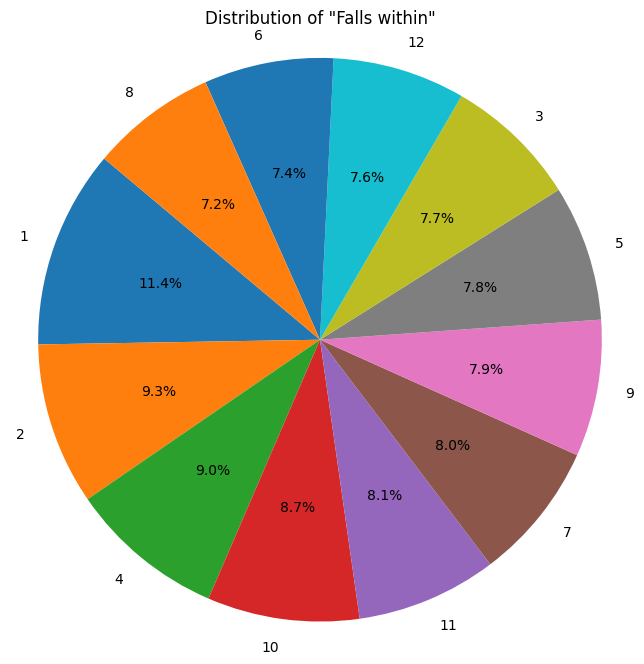

In [31]:
report_counts = outcomes['month'].value_counts()
report_counts

plt.figure(figsize=(8, 8))  # Optional: adjust figure size
plt.pie(report_counts, labels=report_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of "Falls within"')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle

# Show the plot
print(report_counts)
plt.show()

In [96]:
outcomes[outcomes['year'].isna()]

,Crime ID,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,Outcome type,year,month


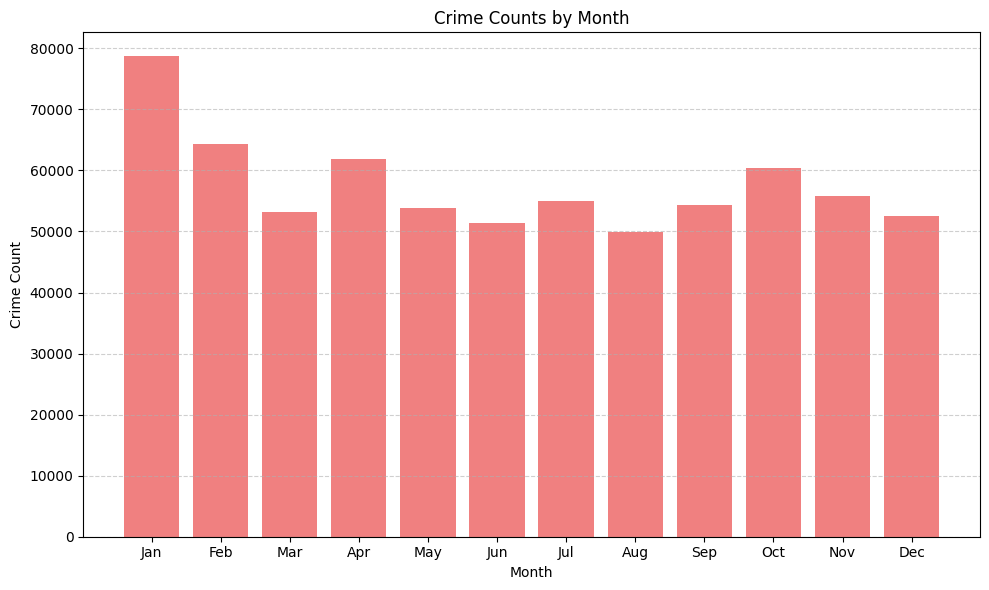

1     78684
2     64371
3     53267
4     61918
5     53850
6     51387
7     55037
8     49994
9     54316
10    60327
11    55853
12    52582
dtype: int64


In [94]:
import matplotlib.pyplot as plt
import pandas as pd
import calendar

# Data as a pandas Series
month_counts = pd.Series({
    1: 78684, 2: 64371, 4: 61918, 10: 60327, 11: 55853, 7: 55037,
    9: 54316, 5: 53850, 3: 53267, 12: 52582, 6: 51387, 8: 49994
})

# Sort by month
month_counts = month_counts.sort_index()

# Convert numeric month index to month name
month_names = [calendar.month_abbr[i] for i in month_counts.index]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(month_names, month_counts.values, color='lightcoral')

# Customize plot
plt.title('Crime Counts by Month')
plt.xlabel('Month')
plt.ylabel('Crime Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


print(month_counts)

## EDA on Search&Stop

In [32]:
search

,Date,Part of a policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,Person search,Vehicle search
0,2015-03-02 16:40:00+00:00,True,NaN,NaN,Male,25-34,Asian or Asian British - Bangladeshi (A3),Asian,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Suspect arrested,True,False,True,False
1,2015-03-02 16:40:00+00:00,True,NaN,NaN,Male,25-34,Asian or Asian British - Bangladeshi (A3),Asian,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Suspect arrested,False,False,True,False
2,2015-03-02 18:45:00+00:00,True,NaN,NaN,Male,25-34,White - Any other White ethnic background (W9),White,Police and Criminal Evidence Act 1984 (section 1),NaN,Suspect arrested,True,True,True,False
3,2015-03-02 19:15:00+00:00,True,NaN,NaN,Male,over 34,White - White British (W1),White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Suspect arrested,False,False,True,False
4,2015-03-03 15:50:00+00:00,True,NaN,NaN,Male,25-34,White - White British (W1),White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Suspect arrested,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1750425,2025-02-28 18:45:46+00:00,True,51.510723,-0.084844,Male,10-17,Other ethnic group - Not stated,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,Arrest,True,False,True,False
1750426,2025-02-28 20:03:44+00:00,True,51.513100,-0.072542,Male,18-24,Other ethnic group - Not stated,Asian,Misuse of Drugs Act 1971 (section 23),Evidence of offences under the Act,A no further action disposal,False,False,True,True
1750427,2025-02-28 21:25:07+00:00,True,51.514626,-0.097291,Male,25-34,White - Any other White background,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Community resolution,True,False,True,False
1750428,2025-02-28 21:30:36+00:00,True,51.514626,-0.097291,Male,18-24,White - Any other White background,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Community resolution,True,False,True,False


##### Part of Policing Operation

Part of a policing operation
True    1750430
Name: count, dtype: int64


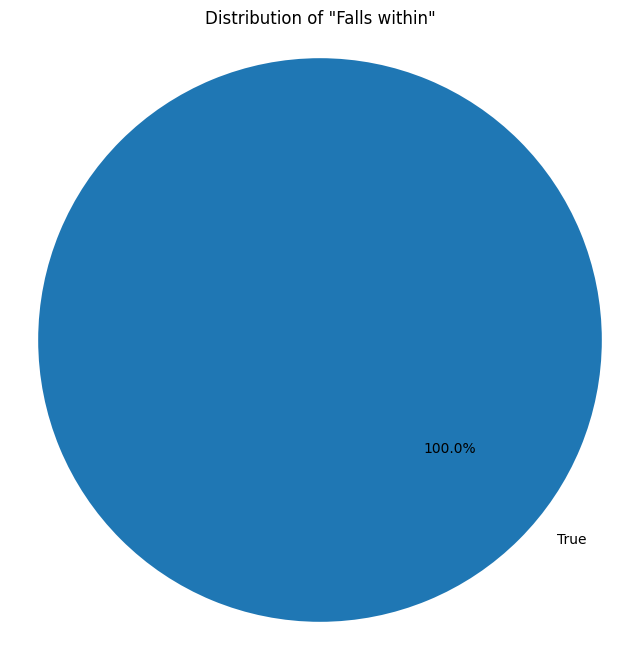

In [33]:
report_counts = search['Part of a policing operation'].value_counts()
report_counts

plt.figure(figsize=(8, 8))  # Optional: adjust figure size
plt.pie(report_counts, labels=report_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of "Falls within"')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle

# Show the plot
print(report_counts)
plt.show()

##### Longitude and Latitude

In [34]:
longitude_missing = len(search[search['Longitude'].isna()])
latitude_missing = len(search[search['Latitude'].isna()])


print(longitude_missing,'longitude missing')
print(latitude_missing,'longitude missing')

print((longitude_missing/len(search['Longitude']))*100, 'longitude perc missing')
print((latitude_missing/len(search['Latitude']))*100, 'latitude perc missing')

358826 longitude missing
358826 longitude missing
20.499305884839725 longitude perc missing
20.499305884839725 latitude perc missing


##### Gender

['Male', 'Female', NaN, 'Other']
Categories (3, object): ['Female', 'Male', 'Other']
Gender
Male      1593727
Female     126233
Other       10118
Name: count, dtype: int64


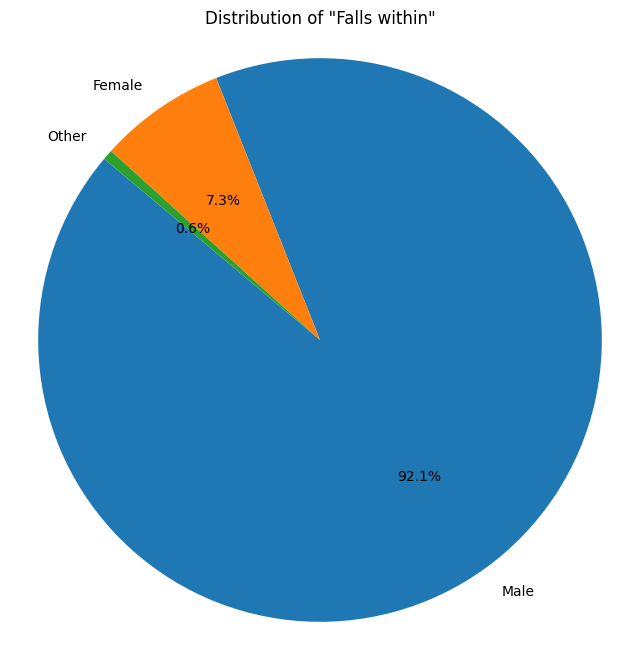

In [36]:
print(search['Gender'].unique())

report_counts = search['Gender'].value_counts()
report_counts

plt.figure(figsize=(8, 8))  # Optional: adjust figure size
plt.pie(report_counts, labels=report_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of "Falls within"')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle

# Show the plot
print(report_counts)
plt.show()

##### Officer-defined ethnicity	

['Asian', 'White', 'Black', 'Other', NaN, 'Mixed']
Categories (5, object): ['Asian', 'Black', 'Mixed', 'Other', 'White']
Officer-defined ethnicity
White    689133
Black    668017
Asian    281806
Other     76114
Mixed         1
Name: count, dtype: int64


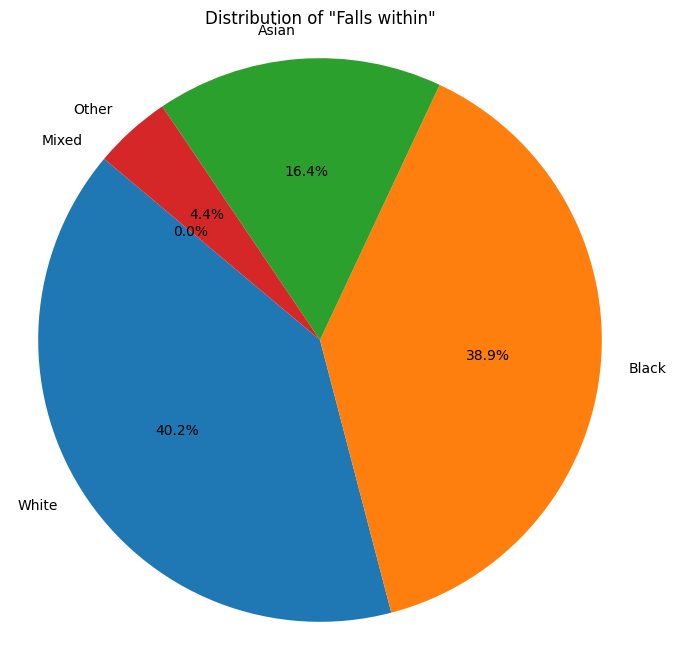

In [37]:
print(search['Officer-defined ethnicity'].unique())

report_counts = search['Officer-defined ethnicity'].value_counts()
report_counts

plt.figure(figsize=(8, 8))  # Optional: adjust figure size
plt.pie(report_counts, labels=report_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of "Falls within"')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle

# Show the plot
print(report_counts)
plt.show()

##### Outcome

In [47]:
search['Outcome'].unique()

['Suspect arrested', 'Nothing found - no further action', 'Offender given drugs possession warning', 'Local resolution', 'Offender given penalty notice', ..., 'A no further action disposal', 'Penalty Notice for Disorder', 'Community resolution', 'Summons / charged by post', 'Caution (simple or conditional)']
Length: 16
Categories (15, object): ['A no further action disposal', 'Arrest', 'Article found - Detailed outcome unavailable', 'Caution (simple or conditional)', ..., 'Penalty Notice for Disorder', 'Summons / charged by post', 'Suspect arrested', 'Suspect summonsed to court']

## EDA for busylocations

In [8]:
busylocations

,geometry,addr:city,addr:housenumber,addr:postcode,addr:street,brand,brand:wikidata,check_date,fhrs:confidence_management,fhrs:hygiene,...,restriction,marked,paving_stones:material,source:access:conditional,source:fee:conditional,goods,abandoned,parking:both:orientation,latitude,longitude
0,b'\x01\x01\x00\x00\x00tb\x0f\xedc\x05\xc0\xbf(...,London,22-25,WC2E 9EQ,Bedford Street,Tesco Express,Q98456772,2022-06-27,10,5,...,None,None,None,None,None,None,None,None,51.511122,-0.125165
1,b'\x01\x01\x00\x00\x00H\xb5\x99T~c\xc7\xbf*\x0...,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,51.550055,-0.182724
2,b'\x01\x01\x00\x00\x00\xee\xc0\xef\x95/\x1e\xc...,London,23-25,N6 6QX,Swain's Lane,Tesco Express,Q98456772,None,None,None,...,None,None,None,None,None,None,None,None,51.562078,-0.149359
3,"b'\x01\x01\x00\x00\x00""\xf7\x19\xbcT\x11\xc1\x...",London,196-206,NW1 9HG,Camden Road,Tesco Express,Q98456772,None,None,None,...,None,None,None,None,None,None,None,None,51.545341,-0.133341
4,b'\x01\x01\x00\x00\x00\x9d~\xf5]\xb6B\xb3\xbf\...,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,51.551313,-0.075237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91888,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x0b\x00...,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,51.515215,-0.168673
91889,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\t\x00\x...,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,51.413759,-0.077673
91890,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x08\x00...,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,51.494106,-0.236990
91891,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x0c\x00...,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,51.409700,-0.149445


In [13]:
# Count total rows
initial_rows = len(busylocations)
print(initial_rows, 'total number of initial rows')

# Missing Longitude analysis
missing_long = busylocations[busylocations['longitude'].isna()]
num_missing_long = len(missing_long)
print(num_missing_long, 'number of rows that have Longitude missing (unidentifiable)')
print(num_missing_long / initial_rows * 100, '% percentage of rows that are missing Longitude')

# Rows with Longitude present
print(initial_rows - num_missing_long, 'number of rows that contain Longitude')

# Missing Latitude analysis
missing_lat = busylocations[busylocations['latitude'].isna()]
num_missing_lat = len(missing_lat)
print(num_missing_lat, 'number of rows that have Latitude missing (unidentifiable)')
print(num_missing_lat / initial_rows * 100, '% percentage of rows that are missing Latitude')

# Rows with Latitude present
print(initial_rows - num_missing_lat, 'number of rows that contain Latitude')

# Check rows missing both Latitude and Longitude
missing_both = busylocations[busylocations['latitude'].isna() & busylocations['longitude'].isna()]
num_missing_both = len(missing_both)
print(num_missing_both, 'number of rows missing both Latitude and Longitude')

# Verify if all missing values are in the same rows
if num_missing_both == num_missing_lat == num_missing_long:
    print("✅ All missing Latitude and Longitude values are from the same rows.")
else:
    print("⚠️ Latitude and Longitude missing values are not from the exact same rows.")


91893 total number of initial rows
0 number of rows that have Longitude missing (unidentifiable)
0.0 % percentage of rows that are missing Longitude
91893 number of rows that contain Longitude
0 number of rows that have Latitude missing (unidentifiable)
0.0 % percentage of rows that are missing Latitude
91893 number of rows that contain Latitude
0 number of rows missing both Latitude and Longitude
✅ All missing Latitude and Longitude values are from the same rows.


# TODO

# EDA deprivation

In [16]:
deprivation

,ls11cd,la19nm,england_imd_rank,england_imd_decile,london_imd_rank,london_imd_decile,IDAOP_london_rank,IDAOP_london_decile,IDACI_london_rank,IDACI_london_decile,...,crime_london_rank,crime_london_decile,barriers_london_rank,barriers_london_decile,livingEnv_london_rank,livingEnv_london_decile,health_london_rank,health_london_decile,edu_london_rank,edu_london_decile
0,E01000001,City of London,29199,9,4576,10,"32,820",10,32806,10,...,32662,10,2679,6,7789,4,32113,10,32842,10
1,E01000002,City of London,30379,10,4700,10,"31,938",10,29682,10,...,32789,10,3645,8,13070,7,29705,9,32832,10
2,E01000003,City of London,14915,5,2562,6,"16,377",8,27063,9,...,29363,10,984,3,4092,2,17600,4,26386,8
3,E01000005,City of London,8678,3,1325,3,"3,885",3,9458,4,...,31059,10,1003,3,9397,5,17907,4,12370,2
4,E01000006,Barking and Dagenham,14486,5,2485,6,"12,934",7,13592,6,...,18848,8,495,2,10629,6,21581,6,17511,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4830,E01033742,Greenwich,20945,7,3538,8,"13,951",7,15247,6,...,19491,8,936,2,21492,10,22041,6,24139,7
4831,E01033743,Greenwich,13578,5,2347,5,"1,937",2,12435,5,...,13267,6,153,1,22054,10,19077,5,22640,6
4832,E01033744,Greenwich,8319,3,1235,3,"1,097",1,10715,5,...,10943,5,1345,3,19969,10,5225,1,15227,3
4833,E01033745,Greenwich,12697,4,2184,5,"5,167",4,11278,5,...,20703,9,503,2,19362,10,19154,5,22088,6


In [20]:
# List all columns in deprivation index

print(list(deprivation.columns))

['ls11cd', 'la19nm', 'england_imd_rank', 'england_imd_decile', 'london_imd_rank', 'london_imd_decile', 'IDAOP_london_rank', 'IDAOP_london_decile', 'IDACI_london_rank', 'IDACI_london_decile', 'Income_london_rank', 'Income_london_decile', 'employment_london_rank', 'employment_london_decile', 'crime_london_rank', 'crime_london_decile', 'barriers_london_rank', 'barriers_london_decile', 'livingEnv_london_rank', 'livingEnv_london_decile', 'health_london_rank', 'health_london_decile', 'edu_london_rank', 'edu_london_decile']


# TODO

# EDA ethnicity

In [18]:
ethnicity

,Lower tier local authorities Code,Lower tier local authorities,Ethnic group (20 categories) Code,Ethnic group (20 categories),Observation
0,E09000002,Barking and Dagenham,-8,Does not apply,0
1,E09000002,Barking and Dagenham,1,"Asian, Asian British or Asian Welsh: Bangladeshi",22393
2,E09000002,Barking and Dagenham,2,"Asian, Asian British or Asian Welsh: Chinese",1385
3,E09000002,Barking and Dagenham,3,"Asian, Asian British or Asian Welsh: Indian",11503
4,E09000002,Barking and Dagenham,4,"Asian, Asian British or Asian Welsh: Pakistani",15799
...,...,...,...,...,...
635,E09000033,Westminster,15,White: Gypsy or Irish Traveller,49
636,E09000033,Westminster,16,White: Roma,1503
637,E09000033,Westminster,17,White: Other White,50276
638,E09000033,Westminster,18,Other ethnic group: Arab,15439


# TODO

# EDA age

In [24]:
age

,Area,mnemonic,Aged 0 - 15,%,Aged 16 - 64,%.1,Aged 65 and over,%.2,Aged 16 - 59/64,%.3,...,%.19,Aged 70 - 74 years,%.20,Aged 75 - 79 years,%.21,Aged 80 - 84 years,%.22,Aged 85 and over,%.23,Sex
0,0.0,0.0,29239,27.0,70405,64.9,8763,8.1,70405,64.9,...,2.9,2095,1.9,1602,1.5,974,0.9,902,"0.8""",Male
1,0.0,0.0,42306,22.1,122989,64.2,26424,13.8,122989,64.2,...,4.1,6563,3.4,5482,2.9,3261,1.7,3332,"1.7""",Male
2,0.0,0.0,26278,21.7,76170,63.0,18498,15.3,76170,63.0,...,4.4,4480,3.7,3981,3.3,2424,2.0,2273,"1.9""",Male
3,0.0,0.0,33412,19.8,116269,69.0,18908,11.2,116269,69.0,...,3.8,4703,2.8,3309,2.0,2232,1.3,2176,"1.3""",Male
4,0.0,0.0,33238,21.0,99006,62.4,26363,16.6,99006,62.4,...,4.6,6195,3.9,5947,3.7,3583,2.3,3361,"2.1""",Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.0,0.0,56403,17.2,253140,77.0,19083,5.8,248784,75.7,...,2.1,4824,1.5,3174,1.0,2137,0.7,2099,0.6,Total
98,0.0,0.0,55655,20.2,190822,69.1,29503,10.7,184032,66.7,...,3.4,7096,2.6,5639,2.0,3774,1.4,3724,1.3,Total
99,0.0,0.0,52651,15.9,245972,74.2,32833,9.9,239098,72.1,...,2.9,8081,2.4,6552,2.0,4344,1.3,4307,1.3,Total
100,0.0,0.0,26509,12.5,158844,75.1,26155,12.4,153309,72.5,...,3.7,6284,3.0,5127,2.4,3431,1.6,3409,1.6,Total


# TODO